## Problem - Clustering

##### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

##### <span style="color:green">Data Dictionary for Market Segmentation:</span>

##### 1. spending: Amount spent by the customer per month (in 1000s)
##### 2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
##### 3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
##### 4. current_balance: Balance amount left in the account to make purchases (in 1000s)
##### 5. credit_limit: Limit of the amount in credit card (10000s)
##### 6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
##### 7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

##### <span style="color:red">Questions :</span>

##### <span style="color:purple"> 1.1)  Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).</span>

In [4]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# Reading the data 
df_cluster =pd.read_csv('bank_marketing_part1_Data.csv') 
df_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
# Information of the data 
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
# Descriptive statistics to summarize the data
df_cluster.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [5]:
# Shape of the data (No. of Row's & Column's)
df_cluster.shape

(210, 7)

In [6]:
# Checking for null values (if it is there)
df_cluster.isnull().values.any()

False

In [7]:
# Checking for duplicate data 
df_cluster.duplicated().values.any()

False

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


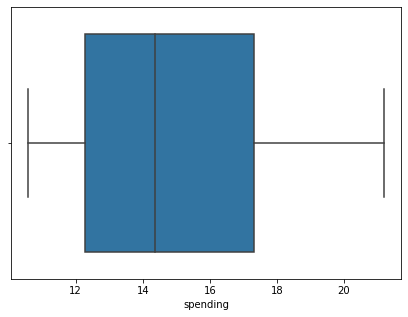

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


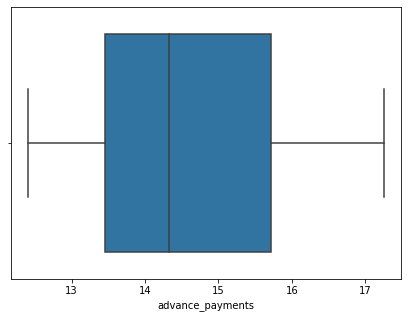

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


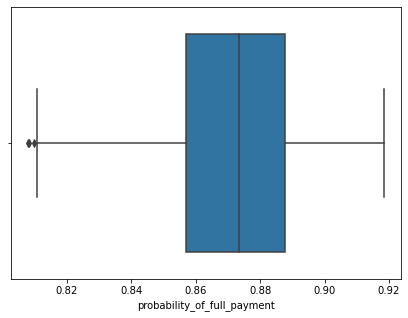

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


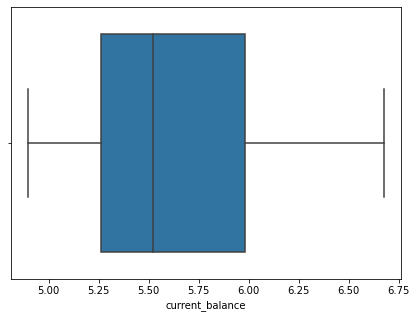

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


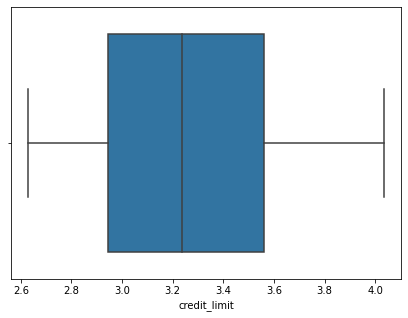

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


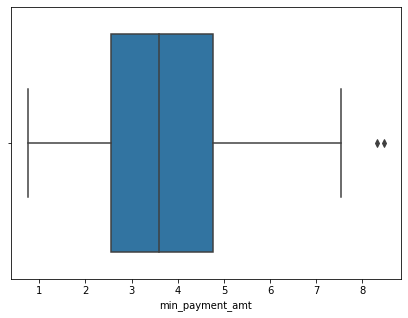

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


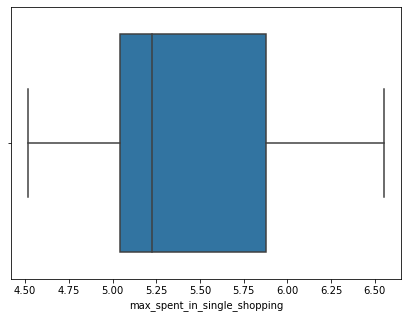

In [8]:
# Checking for outliers
for column in df_cluster:
    plt.subplots(figsize=(7,5))
    sns.boxplot(df_cluster[column])
    plt.show()

In [9]:
# Treating Outliers 
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    
    
    return lower_range, upper_range

In [10]:
for feature in df_cluster[['probability_of_full_payment', 'min_payment_amt']]: 
    lr,ur=treat_outlier(df_cluster[feature])
    df_cluster[feature]=np.where(df_cluster[feature]>ur,ur,df_cluster[feature])
    df_cluster[feature]=np.where(df_cluster[feature]<lr,lr,df_cluster[feature])

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


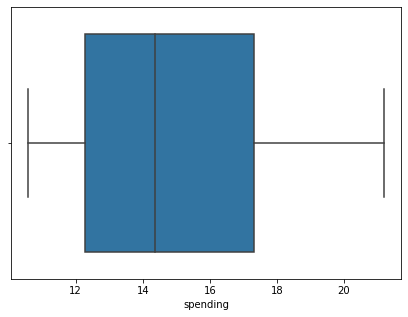

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


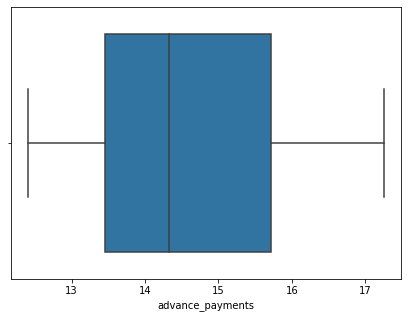

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


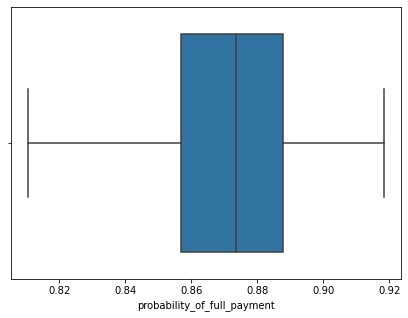

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


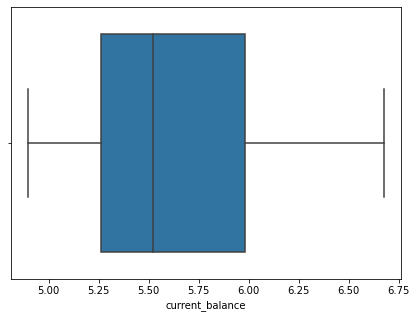

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


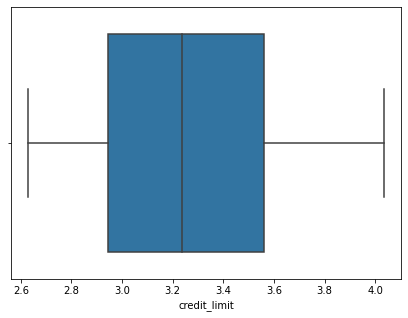

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


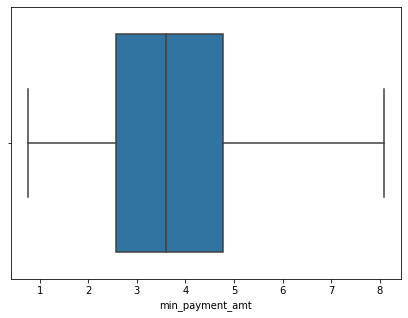

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


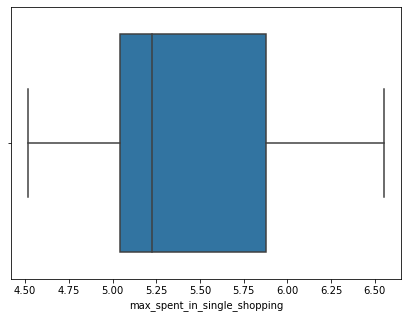

In [11]:
# Checking outliers after treating them

for column in df_cluster:
    plt.subplots(figsize=(7,5))
    sns.boxplot(df_cluster[column])
    plt.show()


In [12]:
# Before doing Univariate , Bi-variate & Mulltivariate analysis here I would like to scale the data.
df_cluster_scaled = df_cluster.apply(zscore)
df_cluster_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [13]:
# Defining a method for Univariate Analysis 
def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_cluster_scaled[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_cluster_scaled[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_cluster_scaled[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    2.100000e+02
mean     9.148766e-16
std      1.002389e+00
min     -1.466714e+00
25%     -8.879552e-01
50%     -1.696741e-01
75%      8.465989e-01
max      2.181534e+00
Name: spending, dtype: float64 
----------------------------------------------------------------------------
Distribution of spending
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


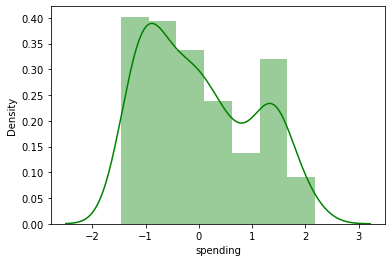

BoxPlot of spending
----------------------------------------------------------------------------


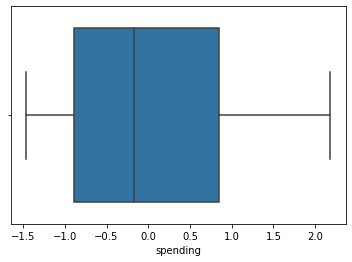

Description of advance_payments
----------------------------------------------------------------------------
count    2.100000e+02
mean     1.097006e-16
std      1.002389e+00
min     -1.649686e+00
25%     -8.514330e-01
50%     -1.836639e-01
75%      8.870693e-01
max      2.065260e+00
Name: advance_payments, dtype: float64 
----------------------------------------------------------------------------
Distribution of advance_payments
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


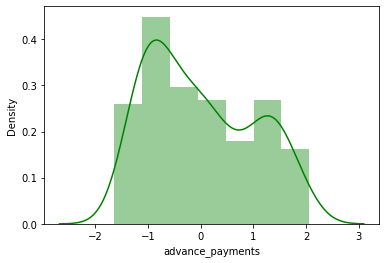

BoxPlot of advance_payments
----------------------------------------------------------------------------


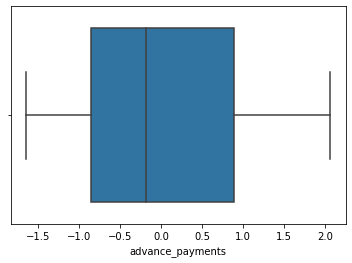

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    2.100000e+02
mean     1.642601e-15
std      1.002389e+00
min     -2.571391e+00
25%     -6.009681e-01
50%      1.031721e-01
75%      7.126469e-01
max      2.011371e+00
Name: probability_of_full_payment, dtype: float64 
----------------------------------------------------------------------------
Distribution of probability_of_full_payment
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


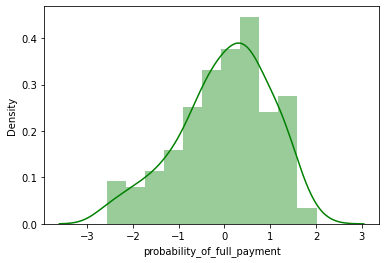

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


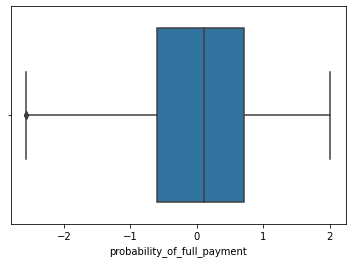

Description of current_balance
----------------------------------------------------------------------------
count    2.100000e+02
mean    -1.089076e-16
std      1.002389e+00
min     -1.650501e+00
25%     -8.286816e-01
50%     -2.376280e-01
75%      7.945947e-01
max      2.367533e+00
Name: current_balance, dtype: float64 
----------------------------------------------------------------------------
Distribution of current_balance
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


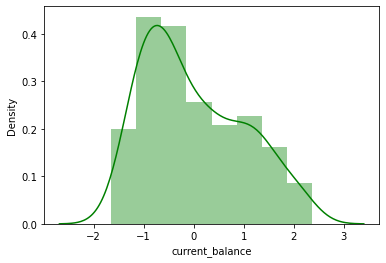

BoxPlot of current_balance
----------------------------------------------------------------------------


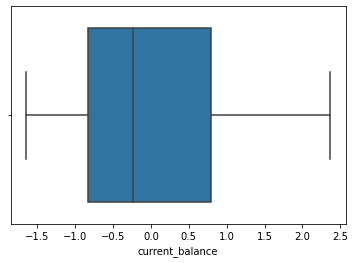

Description of credit_limit
----------------------------------------------------------------------------
count    2.100000e+02
mean    -2.994298e-16
std      1.002389e+00
min     -1.668209e+00
25%     -8.349072e-01
50%     -5.733534e-02
75%      8.044956e-01
max      2.055112e+00
Name: credit_limit, dtype: float64 
----------------------------------------------------------------------------
Distribution of credit_limit
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


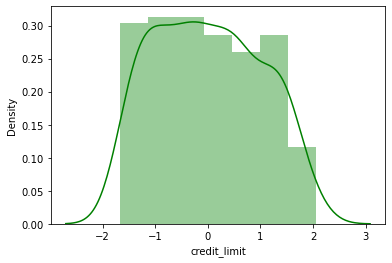

BoxPlot of credit_limit
----------------------------------------------------------------------------


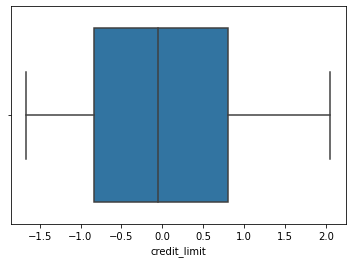

Description of min_payment_amt
----------------------------------------------------------------------------
count    2.100000e+02
mean     1.512018e-16
std      1.002389e+00
min     -1.966425e+00
25%     -7.616981e-01
50%     -6.591519e-02
75%      7.185591e-01
max      2.938945e+00
Name: min_payment_amt, dtype: float64 
----------------------------------------------------------------------------
Distribution of min_payment_amt
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


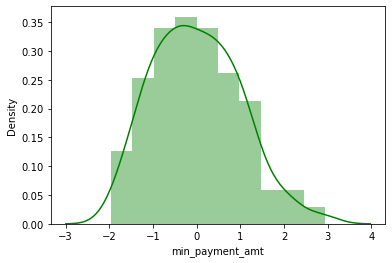

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


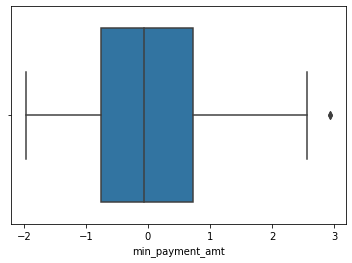

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    2.100000e+02
mean    -1.935489e-15
std      1.002389e+00
min     -1.813288e+00
25%     -7.404953e-01
50%     -3.774588e-01
75%      9.563941e-01
max      2.328998e+00
Name: max_spent_in_single_shopping, dtype: float64 
----------------------------------------------------------------------------
Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


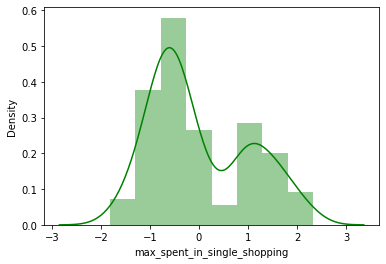

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


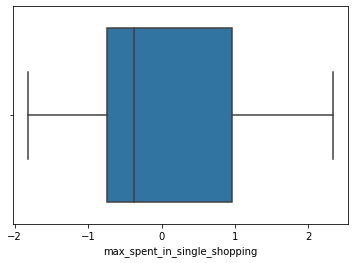

In [14]:
for x in df_cluster_scaled:
    univariateAnalysis(x,10)

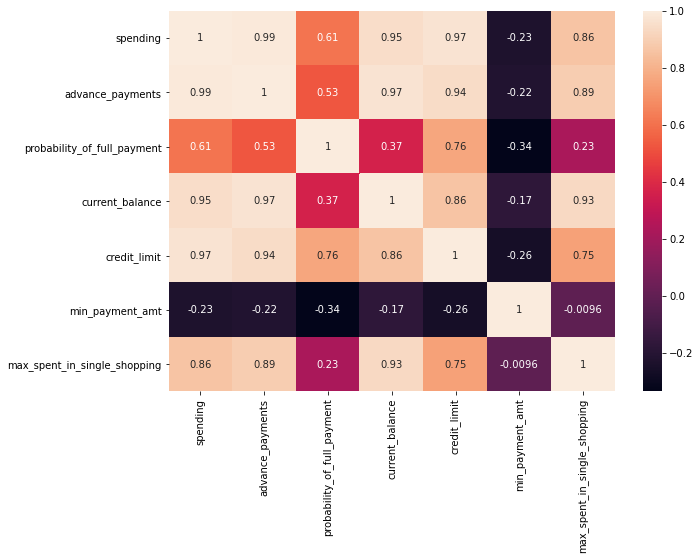

In [15]:
# Bi-variate Analysis
plt.subplots(figsize=(10,7))
sns.heatmap(df_cluster_scaled.corr(),annot=True);

In [16]:
df_cluster_scaled.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

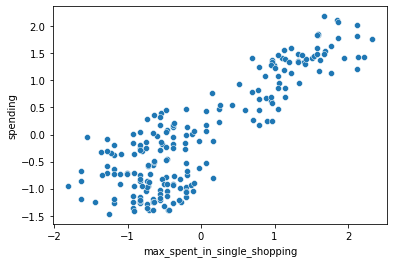

In [17]:
# From the above heat-map if we want to derive relationship b/w two specific columns and can be further derived through scatter-plot.
sns.scatterplot(data=df_cluster_scaled, x="max_spent_in_single_shopping", y="spending");

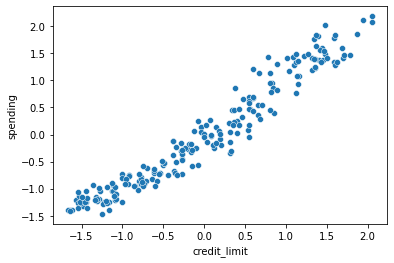

In [18]:
sns.scatterplot(data=df_cluster_scaled, x="credit_limit", y="spending");

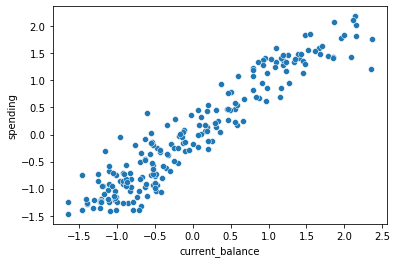

In [19]:
sns.scatterplot(data=df_cluster_scaled, x="current_balance", y="spending");

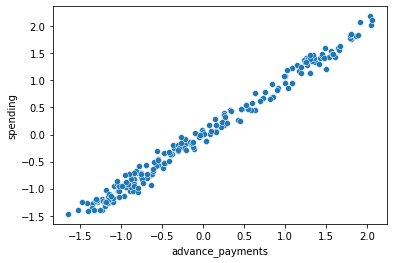

In [20]:
sns.scatterplot(data=df_cluster_scaled, x="advance_payments", y="spending");

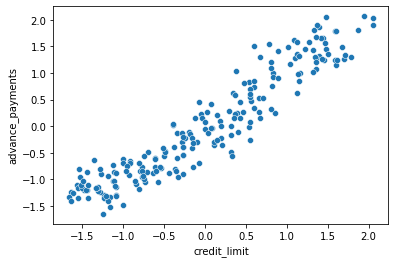

In [21]:
sns.scatterplot(data=df_cluster_scaled, x="credit_limit", y="advance_payments");

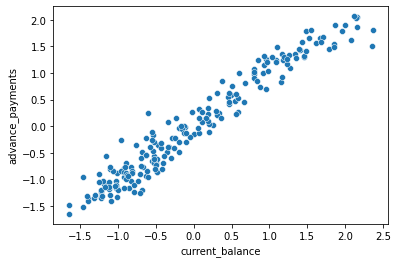

In [22]:
sns.scatterplot(data=df_cluster_scaled, x="current_balance", y="advance_payments");

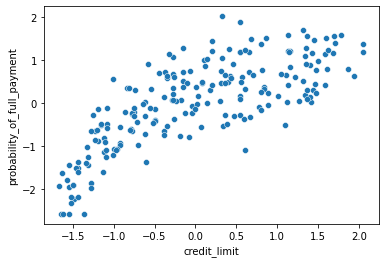

In [24]:
sns.scatterplot(data=df_cluster_scaled, x="credit_limit", y="probability_of_full_payment");

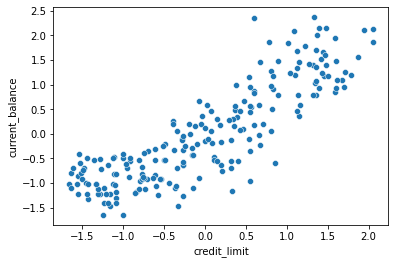

In [25]:
sns.scatterplot(data=df_cluster_scaled, x="credit_limit", y="current_balance");

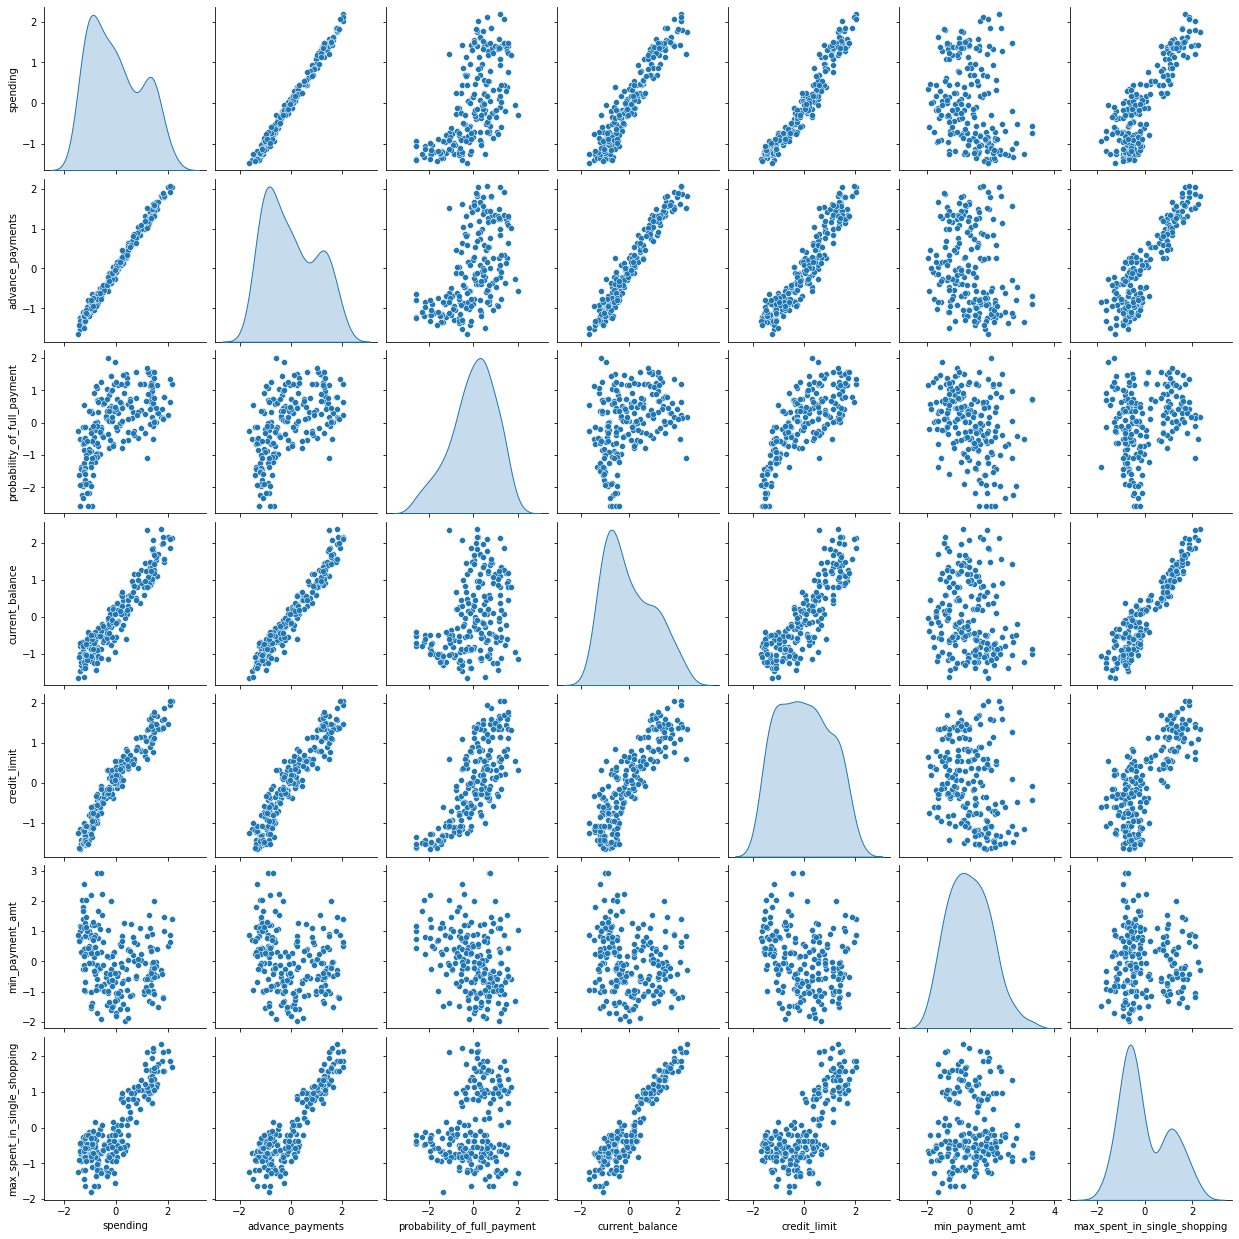

In [26]:
# Multivariate Analysis
sns.pairplot(df_cluster_scaled,diag_kind='kde');

##### <span style="color:purple"> 1.2)  Do you think scaling is necessary for clustering in this case? Justify </span>

##### Basically if all the columns in a table or dataset are not in a same magnitude then its really difficult to compare them and come to a conclusion , so by scaling them we bring their magnitude into a certain range where we can compare them and come to conclusion , derive business implications.
##### Here we can see the same , hence we need to do scaling before we derive any business implications .

##### The most common techniques of feature scaling are Normalization and Standardization.
##### Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1 .

##### <span style="color:purple"> 1.3)  Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them </span>

In [27]:
link_method = linkage(df_cluster_scaled, method = 'ward')

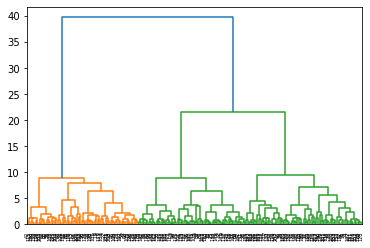

In [28]:
dend = dendrogram(link_method)

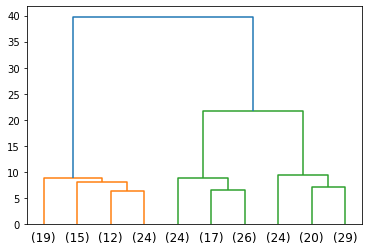

In [29]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10
                 )

##### From the above dendrogram , I can see that if I draw a horizontal line above 15 and below 20 then there are 3 vertical lines falling within that range . By using "maxclust" we can verify that those 3 clusters are good enough or not .

In [30]:
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

##### From the above method we can see that 3 clusters are good enough here .

##### <span style="color:purple"> 1.4)  Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.</span>

In [31]:
# As in K-Means clustering we need pre-determine the number of cluster , here I take a random value of K =3 .Here I need to get the optimal WSS plot in order to derive at the optimal number of clusters.
k_means = KMeans(n_clusters = 3,random_state=1)

In [32]:
k_means.fit(df_cluster_scaled)

KMeans(n_clusters=3, random_state=1)

In [33]:
# Deriving the labels 
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2], dtype=int32)

In [34]:
# Deriving the sum of squars or inertia when K=3
k_means.inertia_

430.298481751223

In [35]:
wss=[]

In [36]:
# Here I will have to try for different clusters and find the inertia. The larger the drop in WSS it better.
# If the drop is not significant enough the additional cluster is not useful or not be considered . 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_cluster_scaled)
    wss.append(KM.inertia_)

In [37]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.0356644664012,
 325.9741284729876,
 289.45524862464833,
 263.859944426353,
 239.94446635017925,
 220.59353946108112,
 205.7633419678701]

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


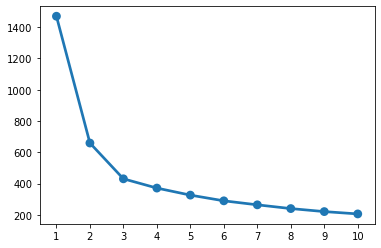

In [38]:
# Applying elbow curve 
array =[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(array,wss);

##### From the above curve I can see that only till x axis value 3 , there are signifinant drop , rest are not useful.

##### Here by applying silhouette score we can find out the mapping of each variable to the specific cluster is appropriate or not. 

In [39]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_cluster_scaled)
labels = k_means.labels_

In [40]:
silhouette_score(df_cluster_scaled,labels,random_state=1)

0.4008059221522216

In [41]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_cluster_scaled)
labels_1 = k_means.labels_

In [42]:
silhouette_score(df_cluster_scaled,labels_1,random_state=1)

0.3373662527862716

##### From the above analysis we can conclude 3 is the optimum cluster , as silhouette score is giving a better answer for no. of cluster = 3 instead no. of cluster = 4.

In [43]:
# Along with silhouette score through silhouette width also we can cross verify that none of the variable are wrongly mapped into clusters , and ideally they should not be negative .

silhouette_width = silhouette_samples(df_cluster_scaled,labels)


In [44]:
# Attaching silhouette width in the dataset 
df_cluster_scaled["silhouette_width"] = silhouette_width

In [45]:
df_cluster_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_width
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,0.573278
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0.365564
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,0.637092
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,0.515595
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,0.360972


In [46]:
# Lets check the min value of silhouette width 
df_cluster_scaled["silhouette_width"].min()

0.0027685411286160638

##### From the above analysis we can see that lowest value of silhouette width is 0.002 , which indicates here that none of the variables are wrongly mapped into cluster.

##### <span style="color:purple"> 1.5)  Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.</span>

In [47]:
# cluster profiling 

df_cluster["Clus_kmeans_3"] = labels
df_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans_3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [48]:
df_cluster["Clus_kmeans_3"].value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans_3, dtype: int64

In [49]:
Cluster_profile = df_cluster
Cluster_profile=Cluster_profile.groupby('Clus_kmeans_3').mean()
Cluster_profile['freq']=df_cluster.Clus_kmeans_3.value_counts().sort_index()
Cluster_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans_3,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


## Problem - CART-RF-ANN

##### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

##### <span style="color:green">Attribute Information:</span>

##### 1. Target: Claim Status (Claimed)
##### 2. Code of tour firm (Agency_Code)
##### 3. Type of tour insurance firms (Type)
##### 4. Distribution channel of tour insurance agencies (Channel)
##### 5. Name of the tour insurance products (Product)
##### 6. Duration of the tour (Duration)
##### 7. Destination of the tour (Destination)
##### 8. Amount of sales of tour insurance policies (Sales)
##### 9. The commission received for tour insurance firm (Commission)
##### 10. Age of insured (Age)

##### <span style="color:red">Questions :</span>

##### <span style="color:purple"> 2.1)  Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).</span>

In [5]:
# Importing Libraries

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [6]:
# Reading the data 
# Reading the data 
df_insurance =pd.read_csv('insurance_part2_data.csv') 
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [7]:
# Information of the data 
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
# Descriptive statistics to summarize the data
df_insurance.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [9]:
# Shape of the data (No. of Row's & Column's)
df_insurance.shape

(3000, 10)

In [10]:
# Checking for null values (if it is there)
df_insurance.isnull().values.any()

False

In [11]:
# Checking for duplicate data 
df_insurance.duplicated().values.any()

True

In [12]:
# Checking how many row's have duplicate records
df_insurance.duplicated().sum()

139

In [13]:
# Cleaning duplicates 
df_insurance.drop_duplicates(inplace=True)
df_insurance.duplicated().sum()

0

In [14]:
# Columns in this dataset 
df_insurance.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [15]:
# Before dropping the traget column , wanted to check the proportion of Claimed & Not Claimed 
df_insurance.Claimed.value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

In [16]:
# Here from the problem statement we can derive that , "Age" column will not going to help us to derive the claim status of the customer.Hence dropping it 
df_insurance_modified = df_insurance.drop(["Age"],axis=1)
df_insurance_modified.head()

,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


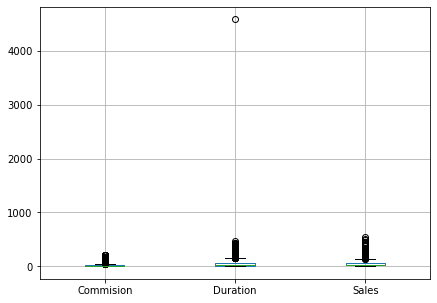

In [17]:
# Checking for outliers only for the numeric columns 
plt.figure(figsize=(7,5))
df_insurance[['Commision', 'Duration', 'Sales']].boxplot();

In [18]:
# Extracting only continuous variables from the dataset
df_insurance_numeric = df_insurance_modified.select_dtypes(include=['float64','int64'])
Numeric_columns = list(df_insurance_numeric.columns.values)
len(Numeric_columns)

3

In [19]:
df_insurance_numeric.columns

Index(['Commision', 'Duration', 'Sales'], dtype='object')

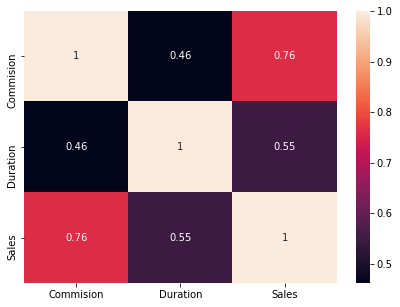

In [20]:
# Checking the correlation among the numeric variables
plt.subplots(figsize=(7,5))
sns.heatmap(df_insurance_numeric.corr(),annot=True);

In [21]:
# Changing all categorical variable to continuous type 
for feature in df_insurance_modified.columns: 
    if df_insurance_modified[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_insurance_modified[feature].unique()))
        print(pd.Categorical(df_insurance_modified[feature].unique()).codes)
        df_insurance_modified[feature] = pd.Categorical(df_insurance_modified[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [22]:
# checking the dataset once after the label encoding 
df_insurance_modified.head()

,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,0,0,0,0.70,1,7,2.51,2,0
1,2,1,0,0.00,1,34,20.00,2,0
2,1,1,0,5.94,1,3,9.90,2,1
3,2,1,0,0.00,1,4,26.00,1,0
4,3,0,0,6.30,1,53,18.00,0,0


In [23]:
# Univariate Analysis

def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_insurance_numeric[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_insurance_numeric[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_insurance_numeric[column])
    plt.show()

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 
----------------------------------------------------------------------------
Distribution of Commision
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


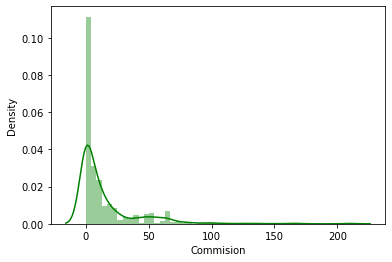

BoxPlot of Commision
----------------------------------------------------------------------------


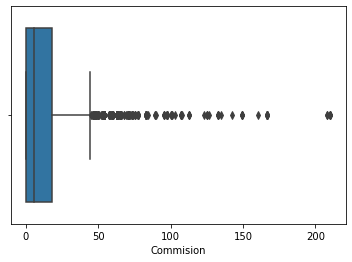

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 
----------------------------------------------------------------------------
Distribution of Duration
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


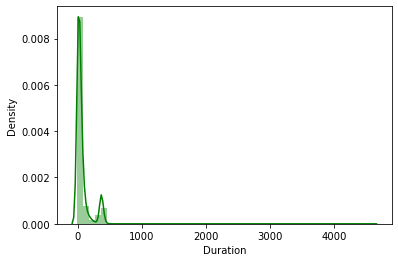

BoxPlot of Duration
----------------------------------------------------------------------------


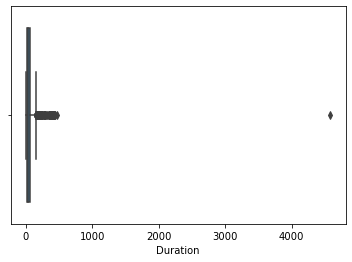

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 
----------------------------------------------------------------------------
Distribution of Sales
----------------------------------------------------------------------------


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


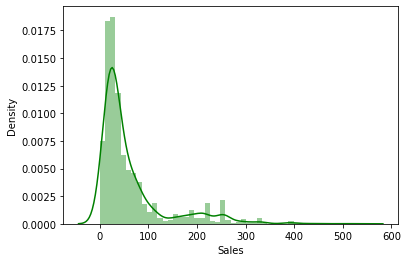

BoxPlot of Sales
----------------------------------------------------------------------------


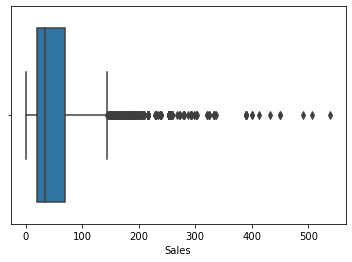

In [24]:
for x in df_insurance_numeric:
    univariateAnalysis(x,10)

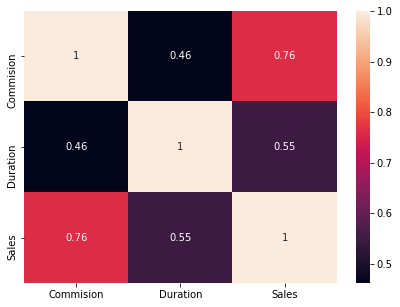

In [25]:
# Bi-variate Analysis
plt.subplots(figsize=(7,5))
sns.heatmap(df_insurance_numeric.corr(),annot=True);

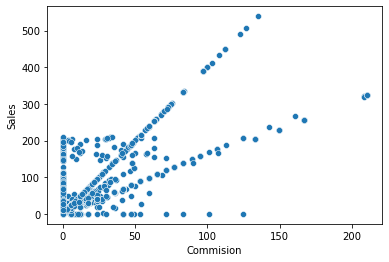

In [26]:
# From this above heat map we can see there is a high correlation b/w Sales & Commision , we can further derive the same in scatter-plot
sns.scatterplot(data=df_insurance_numeric, x="Commision", y="Sales");

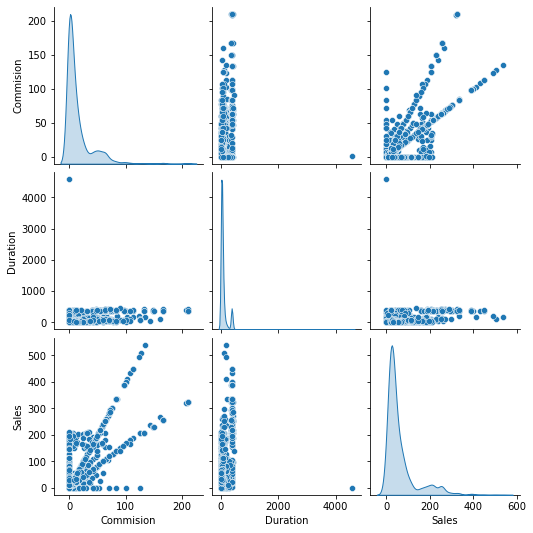

In [27]:
# Multivariate Analysis
sns.pairplot(df_insurance_numeric,diag_kind='kde');

##### <span style="color:purple"> 2.2)  Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network </span>

##### <span style="color:purple"> 2.3)  Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. </span>

In [28]:
# Before doing Train & Test split , wanted to check the proportion of Claimed & Not Claimed 
df_insurance.Claimed.value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

In [29]:
X = df_insurance_modified.drop("Claimed" , axis=1)

y = df_insurance_modified.pop("Claimed")

In [30]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


##### Decision Tree / CART  Classifier

In [130]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [131]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [132]:
from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Tree_File = open('d:\hr_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=HR_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Tree_File.close()

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6,7,8,9],
    'min_samples_leaf': [5,10,15,20],
    'min_samples_split': [45,60,75]
}

dt_model = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [134]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [45, 60, 75]})

In [135]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 75}

In [136]:
best_grid_cart = grid_search.best_estimator_

In [137]:
# since hr_tree.dot file was overgrown and we needed to prune the same , so we can limit few parameter and regenerate the same

from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Pruned_Tree_File = open('d:\hr_tree_pruned.dot','w')
dot_data = tree.export_graphviz(best_grid_cart, out_file=HR_Pruned_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Pruned_Tree_File.close()

In [138]:
ytrain_predict_cart = best_grid_cart.predict(X_train)
ytest_predict_cart = best_grid_cart.predict(X_test)

In [139]:
print(classification_report(train_labels,ytrain_predict_cart))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1359
           1       0.70      0.62      0.65       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [140]:
print(classification_report(test_labels,ytest_predict_cart))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       588
           1       0.64      0.58      0.61       271

    accuracy                           0.76       859
   macro avg       0.73      0.72      0.72       859
weighted avg       0.76      0.76      0.76       859



In [194]:
# Feature Importance - CART

print (pd.DataFrame(best_grid_cart.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Agency_Code   0.495988
Type          0.000000
Commision     0.046303
Channel       0.009335
Duration      0.102527
Sales         0.273973
Product Name  0.045202
Destination   0.026672


AUC: 0.838


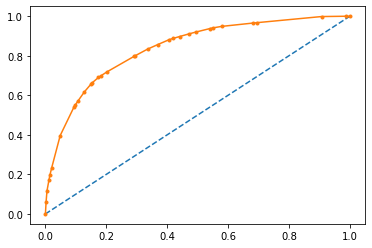

In [176]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_cart.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
# show the plot
plt.show()

AUC: 0.793


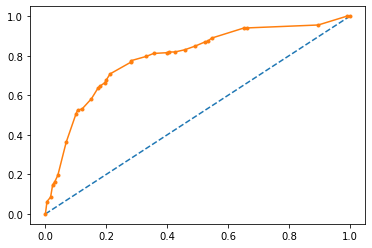

In [177]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_cart.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
# show the plot
plt.show()

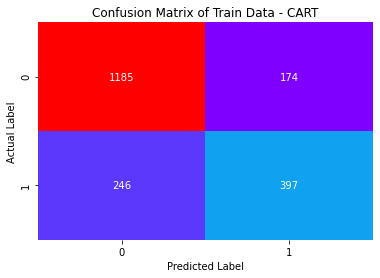

In [145]:
# Confusion Matrix of CART (Train data)
confusion_matrix(train_labels,ytrain_predict_cart)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_cart),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data - CART')
plt.show()

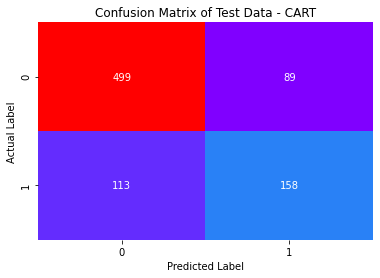

In [146]:
# Confusion Matrix of CART (Test data)
confusion_matrix(test_labels, ytest_predict_cart)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_cart),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data - CART')
plt.show()

In [147]:
best_grid_cart.score(X_train,train_labels)

0.7902097902097902

In [148]:
best_grid_cart.score(X_test,test_labels)

0.7648428405122235

##### Random Forest Classifier

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [101,201, 301]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [150]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [101, 201, 301]})

In [151]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 201}

In [152]:
best_grid_rf = grid_search.best_estimator_

In [153]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [154]:
print(classification_report(train_labels,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.59      0.65       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [155]:
print(classification_report(test_labels,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.70      0.58      0.64       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [196]:
# Feature Importance - RF

print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Agency_Code   0.289713
Type          0.033457
Commision     0.117295
Channel       0.005229
Duration      0.097328
Sales         0.227060
Product Name  0.215517
Destination   0.014400


AUC: 0.850


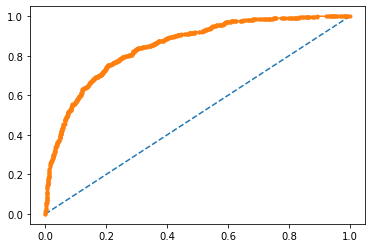

In [178]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
# show the plot
plt.show()

AUC: 0.821


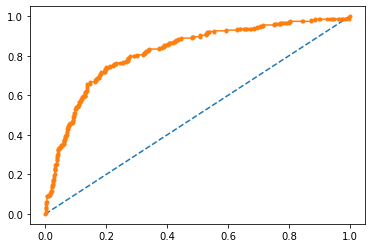

In [179]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
# show the plot
plt.show()

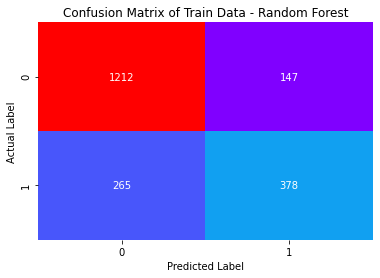

In [158]:
# Confusion Matrix of Random Forest (Train data)
confusion_matrix(train_labels, ytrain_predict_rf)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data - Random Forest')
plt.show()

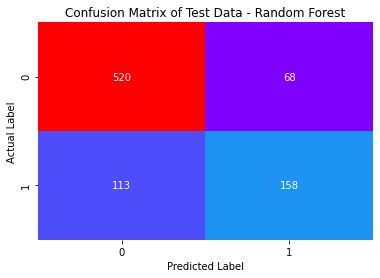

In [159]:
# Confusion Matrix of Random Forest (Test data)
confusion_matrix(test_labels, ytest_predict_rf)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data - Random Forest')
plt.show()

In [160]:
best_grid_rf.score(X_train,train_labels)

0.7942057942057942

In [161]:
best_grid_rf.score(X_test,test_labels)

0.789289871944121

##### MLP Classifier (Artificial Neural Network)

In [162]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [163]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [164]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [165]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [166]:
best_grid_nl = grid_search.best_estimator_

In [167]:
ytrain_predict_nl = best_grid_nl.predict(X_trains)
ytest_predict_nl = best_grid_nl.predict(X_tests)

In [168]:
print(classification_report(train_labels,ytrain_predict_nl))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1359
           1       0.68      0.54      0.60       643

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [169]:
print(classification_report(test_labels,ytest_predict_nl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.69      0.51      0.59       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.72       859
weighted avg       0.76      0.77      0.76       859



AUC: 0.693


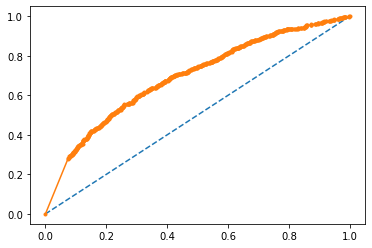

In [180]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_nl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nl_train_fpr, nl_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nl_train_fpr, nl_train_tpr, marker='.')
# show the plot
plt.show()

AUC: 0.682


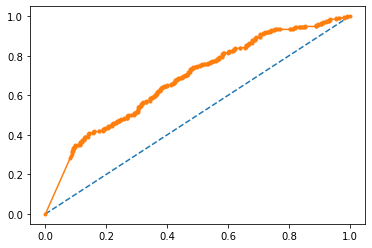

In [181]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_nl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nl_test_fpr, nl_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nl_test_fpr, nl_test_tpr, marker='.')
# show the plot
plt.show()

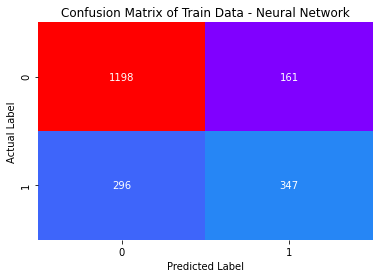

In [172]:
# Confusion Matrix of Neural Network (Train data)
confusion_matrix(train_labels, ytrain_predict_nl)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_nl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data - Neural Network')
plt.show()

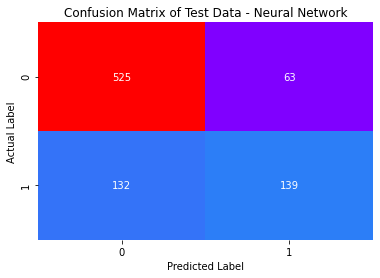

In [173]:
# Confusion Matrix of Neural Network (Test data)
confusion_matrix(test_labels, ytest_predict_nl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_nl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data - Neural Network')
plt.show()

In [174]:
best_grid_nl.score(X_train,train_labels)

0.4015984015984016

In [175]:
best_grid_nl.score(X_test,test_labels)

0.3830034924330617

##### <span style="color:purple"> 2.4)  Final Model: Compare all the models and write an inference which model is best/optimized.</span>

In [91]:
##### From the above evaluation of all 3 models (Through classification report & AUC score) we got below values as performance marices 

##### CART Train classification report :

#              precision    recall  f1-score   support

#            0       0.83      0.87      0.85      1359
#            1       0.70      0.62      0.65       643

#     accuracy                           0.79      2002
#    macro avg       0.76      0.74      0.75      2002
# weighted avg       0.79      0.79      0.79      2002

#  AUC: 0.838


cart_train_acc = 0.79
cart_train_precision = 0.70
cart_train_recall = 0.62
cart_train_f1_score = 0.65
cart_train_auc = 0.838

##### CART Test classification report :

#               precision    recall  f1-score   support

#            0       0.82      0.85      0.83       588
#            1       0.64      0.58      0.61       271

#     accuracy                           0.76       859
#    macro avg       0.73      0.72      0.72       859
# weighted avg       0.76      0.76      0.76       859

#  AUC: 0.793

cart_test_acc = 0.76
cart_test_precision = 0.64
cart_test_recall = 0.58
cart_test_f1_score = 0.61
cart_test_auc = 0.793

##### RF Train classification report :


#               precision    recall  f1-score   support

#            0       0.82      0.89      0.85      1359
#            1       0.72      0.59      0.65       643

#     accuracy                           0.79      2002
#    macro avg       0.77      0.74      0.75      2002
# weighted avg       0.79      0.79      0.79      2002

#   AUC: 0.850


rf_train_acc = 0.79
rf_train_precision = 0.72
rf_train_recall = 0.59
rf_train_f1_score = 0.65
rf_train_auc = 0.850

##### RF Test classification report :


#               precision    recall  f1-score   support

#            0       0.82      0.88      0.85       588
#            1       0.70      0.58      0.64       271

#     accuracy                           0.79       859
#    macro avg       0.76      0.73      0.74       859
# weighted avg       0.78      0.79      0.78       859

#   AUC: 0.821


rf_test_acc = 0.79
rf_test_precision = 0.70
rf_test_recall = 0.58
rf_test_f1_score = 0.64
rf_test_auc = 0.821

##### ANN Train classification report :

#              precision    recall  f1-score   support

#            0       0.80      0.88      0.84      1359
#            1       0.68      0.54      0.60       643

#     accuracy                           0.77      2002
#    macro avg       0.74      0.71      0.72      2002
# weighted avg       0.76      0.77      0.76      2002

# AUC: 0.693

nl_train_acc = 0.77
nl_train_precision = 0.68
nl_train_recall = 0.54
nl_train_f1_score = 0.60
nl_train_auc = 0.693


##### ANN Train classification report :

#              precision    recall  f1-score   support

#            0       0.80      0.89      0.84       588
#            1       0.69      0.51      0.59       271

#     accuracy                           0.77       859
#    macro avg       0.74      0.70      0.72       859
# weighted avg       0.76      0.77      0.76       859

# AUC: 0.682

nl_test_acc = 0.77
nl_test_precision = 0.69
nl_test_recall = 0.51
nl_test_f1_score = 0.59
nl_test_auc = 0.682


In [183]:
# Comparison table based on above 3 classification (CART, RF ,ANN) reports

indices=['Accuracy','Precision','Recall','F1_score','AUC']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_precision,cart_train_recall,cart_train_f1_score,cart_train_auc],
                    'CART Test':[cart_test_acc,cart_test_precision,cart_test_recall,cart_test_f1_score,cart_test_auc],
                    'RF Train':[rf_train_acc,rf_train_precision,rf_train_recall,rf_train_f1_score,rf_train_auc],
                    'RF Test':[rf_test_acc,rf_test_precision,rf_test_recall,rf_test_f1_score,rf_test_auc],
                    'ANN Train':[nl_train_acc,nl_train_precision,nl_train_recall,nl_train_f1_score,nl_train_auc],
                    'ANN Test':[nl_test_acc,nl_test_precision,nl_test_recall,nl_test_f1_score,nl_test_auc]},index=indices)
data


,CART Train,CART Test,RF Train,RF Test,ANN Train,ANN Test
Accuracy,0.790,0.760,0.79,0.790,0.770,0.770
Precision,0.700,0.640,0.72,0.700,0.680,0.690
Recall,0.620,0.580,0.59,0.580,0.540,0.510
F1_score,0.650,0.610,0.65,0.640,0.600,0.590
AUC,0.838,0.793,0.85,0.821,0.693,0.682


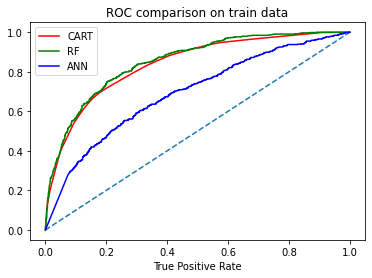

In [191]:
# Comparison graph based on above 3 ROC Curve (CART, RF ,ANN) based on train data

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,color='red',label='CART')
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label='RF')
plt.plot(nl_train_fpr,nl_train_tpr,color='blue',label='ANN')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC comparison on train data')
plt.legend()
plt.show()


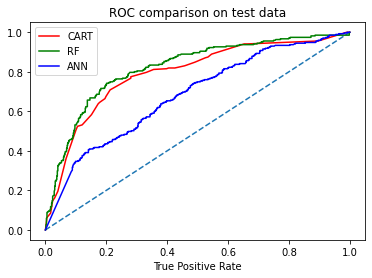

In [193]:
# Comparison graph based on above 3 ROC Curve (CART, RF ,ANN) based on test data

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,color='red',label='CART')
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label='RF')
plt.plot(nl_test_fpr,nl_test_tpr,color='blue',label='ANN')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC comparison on test data')
plt.legend()
plt.show()


##### <span style="color:purple"> 2.5)  Inference: Based on the whole Analysis, what are the business insights and recommendations </span>

In [202]:
# Comparison table basedon performance matrix 
data

,CART Train,CART Test,RF Train,RF Test,ANN Train,ANN Test
Accuracy,0.790,0.760,0.79,0.790,0.770,0.770
Precision,0.700,0.640,0.72,0.700,0.680,0.690
Recall,0.620,0.580,0.59,0.580,0.540,0.510
F1_score,0.650,0.610,0.65,0.640,0.600,0.590
AUC,0.838,0.793,0.85,0.821,0.693,0.682


In [ ]:
# As per the above score of classification report's performanc matrix along with combination of ROC train & test graph we can derive that Random Forest is the right & best chosen model for this particular problem .
# As per the feature importance "Channel" & "Destination" are the features which helps majorly to predict future.